In [1027]:
import pandas as pd
loan = pd.read_csv('processed data.csv')
loan.head(10)

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,...,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,idLoan,flgGood,Loans_Num
0,0dba6b011d,500,12/27/82,Approved,True,1265,True,10/27/10 14:12,6,True,...,Other,4160,586,527,525,637,592,0dba6b011d,Bad,1
1,96acbba7ed,400,5/9/48,Approved,False,1175,True,10/27/10 19:10,4,True,...,Other,5326,564,526,547,677,598,96acbba7ed,Bad,1
2,289421d82a,500,3/31/89,Approved,False,0,True,10/28/10 07:50,6,True,...,Other,2200,663,501,501,623,531,289421d82a,Bad,1
3,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,...,Other,1560,614,574,600,656,561,9ece67d6c5,Good,1
4,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,...,Other,900,708,501,550,651,563,5c2c402094,Bad,1
5,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,...,Other,1434,687,522,561,661,598,e6254cad30,Good,1
6,ae03151fee,500,6/8/80,Approved,True,190,True,10/30/10 11:53,6,True,...,Other,1200,712,585,663,711,603,ae03151fee,Good,2
7,e55a9a7293,700,3/17/62,Approved,True,750,True,11/4/10 22:34,5,True,...,Other,5260,645,556,556,669,604,e55a9a7293,Bad,1
8,cfe9e0dc5e,800,2/24/61,Approved,False,891,True,11/10/10 23:30,5,True,...,Other,1500,600,622,659,698,656,cfe9e0dc5e,Good,1
9,3744b9845d,500,6/4/60,Approved,False,1172,True,11/15/10 17:14,5,True,...,Other,4191,766,618,623,680,631,3744b9845d,Good,1


In [1028]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 34 columns):
customer_id                    659 non-null object
amount_requested               659 non-null int64
birth_date                     659 non-null object
status                         659 non-null object
residence_rent_or_own          659 non-null bool
monthly_rent_amount            659 non-null int64
bank_account_direct_deposit    659 non-null bool
application_when               659 non-null object
loan_duration                  659 non-null int64
payment_ach                    659 non-null bool
num_payments                   659 non-null int64
payment_amount                 659 non-null float64
amount_approved                659 non-null int64
duration_approved              659 non-null int64
payment_amount_approved        637 non-null float64
address_zip                    659 non-null int64
email                          659 non-null object
bank_routing_number            659 non-

In [1029]:
# Create a new feature "Age"(age of customer) form "birth_date"
birthday = []
for birth in loan['birth_date']:
    birth = birth[:-2]+'19'+birth[-2:]
    birthday.append(birth)
loan['birth_date'] = birthday
    
loan['birth_date'] = pd.to_datetime(loan['birth_date'])

from datetime import date
today = date.today()

age = []
for val in loan['birth_date']:
    Age = today.year - val.year - ((today.month, today.day) < (val.month, val.day))
    age.append(Age)
loan['Age'] = age

loan['Age'].head(10)

0    34
1    69
2    28
3    25
4    26
5    36
6    37
7    55
8    56
9    57
Name: Age, dtype: int64

In [1030]:
# Change email into categorical data
loan['email'].loc[loan['email'].str.contains('@yahoo') == True] = 'Yahoo'
loan['email'].loc[loan['email'].str.contains('@gmail') == True] = 'Gmail'
loan['email'].loc[loan['email'].str.contains('@hotmail') == True] = 'Hotmail'
loan['email'].loc[loan['email'].str.contains('@bing') == True] = 'Bing'
loan['email'].loc[loan['email'].str.contains('@aol') == True] = 'Aol'

loan['email'].head(10)

0      Yahoo
1      Yahoo
2      Gmail
3      Gmail
4      Yahoo
5    Hotmail
6    Hotmail
7      Yahoo
8    Hotmail
9      Yahoo
Name: email, dtype: object

In [1031]:
loan.apply(lambda x: sum(x.isnull()),axis=0)  # 0: row 

customer_id                      0
amount_requested                 0
birth_date                       0
status                           0
residence_rent_or_own            0
monthly_rent_amount              0
bank_account_direct_deposit      0
application_when                 0
loan_duration                    0
payment_ach                      0
num_payments                     0
payment_amount                   0
amount_approved                  0
duration_approved                0
payment_amount_approved         22
address_zip                      0
email                            0
bank_routing_number              0
email_duration                   0
residence_duration               0
bank_account_duration            1
payment_frequency                0
home_phone_type                  0
other_phone_type               292
how_use_money                    2
monthly_income_amount            0
raw_l2c_score                    0
raw_FICO_telecom                 0
raw_FICO_retail     

In [1032]:
# Fill payment_amount_approved missing values by multiplying 90% of payment_amount
loan['payment_amount_approved'].fillna(loan['payment_amount']*0.9,inplace=True)
sum(loan['payment_amount_approved'].isnull())

0

In [1033]:
# New Feature: Monthly Income by Approved Payment Amount & Monthly Rent by Approved Payment Amount
loan['Income_By_AppPay']=loan['monthly_income_amount']/loan['payment_amount_approved']
loan['Rent_By_AppPay']=loan['monthly_rent_amount']/loan['payment_amount_approved']

In [1034]:
# Map Loan performance into int
loan['flgGood'] =  loan.flgGood.map({'Bad':0,'Good':1})

In [1035]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def draw_plot(variable):

    ax1 = sns.countplot(variable,data=loan)
    ax1.set_ylim(0,600)
    ax1.grid(False)

    # Calculate Defualt Rate
    DR = 1-loan.groupby(variable).mean()['flgGood']

    # Middle point for each bar
    xaxis=[]
    for p in ax1.patches:  #divide into single patch
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        xaxis.append(x.mean())

    # Default Rate Line
    ax2 = ax1.twinx()
    ax2.plot(xaxis,DR,'r--', label='Default Rate')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Default Rate')
    ax2.legend()
    ax2.grid(None) 

    # Annotate Defualt Rate
    for i in range(len(DR)):
        ax2.annotate('{:.1f}%'.format(DR[i]*100), (xaxis[i], DR[i]+0.025), 
                ha='center',va='bottom') # set the alignment of the text
    

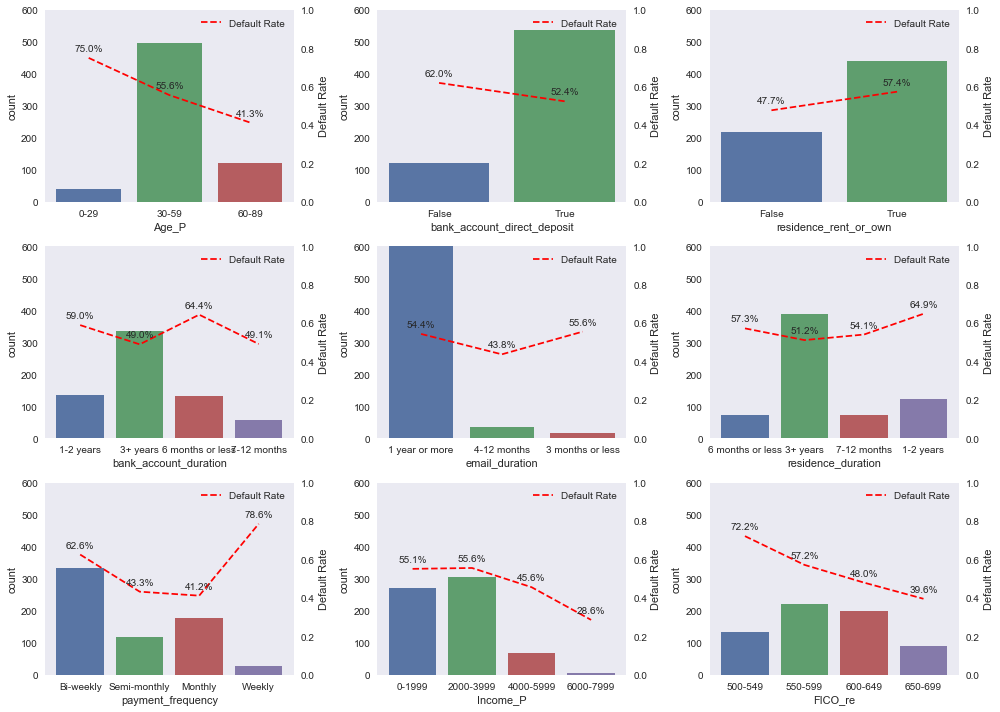

In [1036]:
plt.figure(figsize=(14, 10))

plt.subplot(331)
bins = [0,30,60,90]
group_names =['0-29','30-59','60-89']
loan['Age_P'] = pd.cut(loan['Age'],bins,labels=group_names)
draw_plot('Age_P')

plt.subplot(332)
draw_plot('bank_account_direct_deposit')

plt.subplot(333)
draw_plot('residence_rent_or_own')

plt.subplot(334)
draw_plot('bank_account_duration')

plt.subplot(335)
draw_plot('email_duration')

plt.subplot(336)
draw_plot('residence_duration')

plt.subplot(337)
draw_plot('payment_frequency')

plt.subplot(338)
bins = [0,2000,4000,6000,8000]
group_names =['0-1999','2000-3999','4000-5999','6000-7999']
loan['Income_P'] = pd.cut(loan['monthly_income_amount'],bins,labels=group_names)
draw_plot('Income_P')

plt.subplot(339)
bins = [500,550,600,650,700]
group_names =['500-549','550-599','600-649','650-699']
loan['FICO_re'] = pd.cut(loan['raw_FICO_retail'],bins,labels=group_names)
draw_plot('FICO_re')

plt.tight_layout()


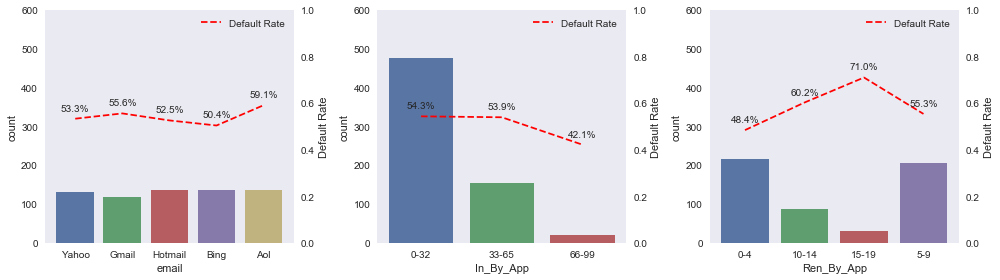

In [1019]:
plt.figure(figsize=(14, 4))

plt.subplot(131)
draw_plot('email')

plt.subplot(132)
bins = [0,33,66,100]
group_names =['0-32','33-65','66-99']
loan['In_By_App'] = pd.cut(loan['Income_By_AppPay'],bins,labels=group_names)
draw_plot('In_By_App')

plt.subplot(133)
bins = [0,5,10,15,20]
group_names =['0-4','5-9','10-14','15-19']
loan['Ren_By_App'] = pd.cut(loan['Rent_By_AppPay'],bins,labels=group_names)
draw_plot('Ren_By_App')

plt.tight_layout()

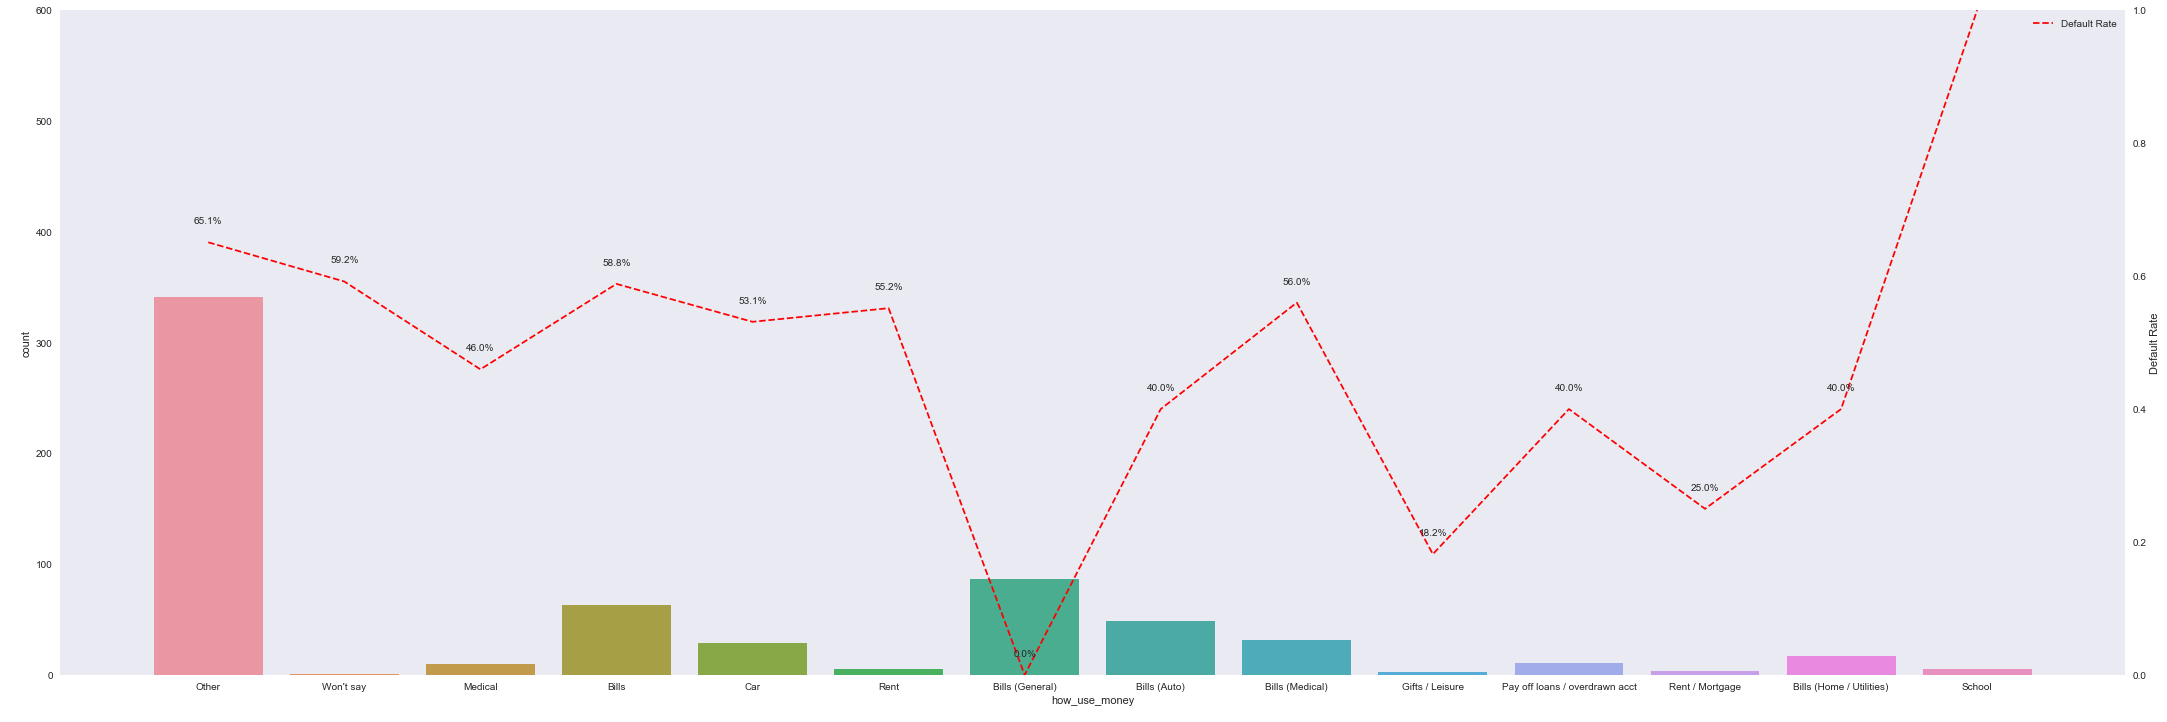

In [1020]:
plt.figure(figsize=(30, 10))
draw_plot('how_use_money')
plt.tight_layout()

In [1021]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 42 columns):
customer_id                    659 non-null object
amount_requested               659 non-null int64
birth_date                     659 non-null datetime64[ns]
status                         659 non-null object
residence_rent_or_own          659 non-null bool
monthly_rent_amount            659 non-null int64
bank_account_direct_deposit    659 non-null bool
application_when               659 non-null object
loan_duration                  659 non-null int64
payment_ach                    659 non-null bool
num_payments                   659 non-null int64
payment_amount                 659 non-null float64
amount_approved                659 non-null int64
duration_approved              659 non-null int64
payment_amount_approved        659 non-null float64
address_zip                    659 non-null int64
email                          659 non-null object
bank_routing_number            

In [1022]:
# Calculate Correlation
import numpy as np
loan_int = loan[['Age','amount_requested','monthly_rent_amount','loan_duration','num_payments','payment_amount','amount_approved'
                ,'duration_approved','payment_amount_approved','monthly_income_amount','raw_l2c_score','raw_FICO_retail']]
loan_int.corr(method='pearson')

,Age,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,monthly_income_amount,raw_l2c_score,raw_FICO_retail
Age,1.000000,0.025920,0.108985,0.007988,-0.214473,0.297852,0.085982,0.049917,0.299020,0.074355,-0.072916,0.034521
amount_requested,0.025920,1.000000,0.096960,0.468018,0.243596,0.226497,0.700967,0.398413,0.218259,0.159925,0.005421,0.011955
monthly_rent_amount,0.108985,0.096960,1.000000,-0.068099,-0.000906,0.089948,0.156558,-0.031164,0.086109,0.429376,0.038944,0.098752
loan_duration,0.007988,0.468018,-0.068099,1.000000,0.414941,-0.120254,0.292364,0.870216,-0.126196,-0.021983,-0.046072,-0.007578
num_payments,-0.214473,0.243596,-0.000906,0.414941,1.000000,-0.668819,0.252034,0.460469,-0.668443,-0.007624,0.031265,-0.083444
payment_amount,0.297852,0.226497,0.089948,-0.120254,-0.668819,1.000000,0.385798,-0.056225,0.987984,0.089810,0.026409,0.155006
amount_approved,0.085982,0.700967,0.156558,0.292364,0.252034,0.385798,1.000000,0.464284,0.373106,0.150742,0.098296,0.146096
duration_approved,0.049917,0.398413,-0.031164,0.870216,0.460469,-0.056225,0.464284,1.000000,-0.062180,-0.011956,0.013518,0.052437
payment_amount_approved,0.299020,0.218259,0.086109,-0.126196,-0.668443,0.987984,0.373106,-0.062180,1.000000,0.088382,0.000711,0.170818
monthly_income_amount,0.074355,0.159925,0.429376,-0.021983,-0.007624,0.089810,0.150742,-0.011956,0.088382,1.000000,0.027616,0.071156


In [1023]:
loan.drop(['customer_id','status','application_when','payment_ach',
          'address_zip','bank_routing_number','other_phone_type','amount_requested',
          'loan_duration','idLoan','birth_date','payment_amount','Age_P','Income_P','FICO_re','In_By_App','Ren_By_App'],1,inplace=True)

In [1024]:
## Convert bool into int
loan['residence_rent_or_own'] = loan['residence_rent_or_own'].astype(int)
loan['bank_account_direct_deposit'] = loan['bank_account_direct_deposit'].astype(int)

In [1025]:
## Convert object into categorical variable
loan['email'] = loan['email'].astype('category')
loan['email_duration'] = loan['email_duration'].astype('category')
loan['residence_duration'] = loan['residence_duration'].astype('category')
loan['bank_account_duration'] = loan['bank_account_duration'].astype('category')
loan['payment_frequency'] = loan['payment_frequency'].astype('category')
loan['home_phone_type'] = loan['home_phone_type'].astype('category')
loan['how_use_money'] = loan['how_use_money'].astype('category')

In [1026]:
loan.dtypes

residence_rent_or_own             int64
monthly_rent_amount               int64
bank_account_direct_deposit       int64
num_payments                      int64
amount_approved                   int64
duration_approved                 int64
payment_amount_approved         float64
email                          category
email_duration                 category
residence_duration             category
bank_account_duration          category
payment_frequency              category
home_phone_type                category
how_use_money                  category
monthly_income_amount             int64
raw_l2c_score                     int64
raw_FICO_telecom                  int64
raw_FICO_retail                   int64
raw_FICO_bank_card                int64
raw_FICO_money                    int64
flgGood                           int64
Loans_Num                         int64
Age                               int64
Income_By_AppPay                float64
Rent_By_AppPay                  float64


In [978]:
loan=pd.get_dummies(loan)
loan.head(10)

,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,num_payments,amount_approved,duration_approved,payment_amount_approved,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,...,how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say
0,1,1265,1,13,500,6,69.651,4160,586,527,...,0,0,0,0,1,0,0,0,0,0
1,0,1175,1,8,400,4,78.111,5326,564,526,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,12,500,6,75.627,2200,663,501,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,6,500,3,124.632,1560,614,574,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,13,500,6,69.651,900,708,501,...,0,0,0,0,1,0,0,0,0,0
5,1,620,1,13,400,6,55.719,1434,687,522,...,0,0,0,0,1,0,0,0,0,0
6,1,190,1,13,500,6,69.651,1200,712,585,...,0,0,0,0,1,0,0,0,0,0
7,1,750,1,10,700,5,115.620,5260,645,556,...,0,0,0,0,1,0,0,0,0,0
8,0,891,1,5,500,5,171.470,1500,600,622,...,0,0,0,0,1,0,0,0,0,0
9,0,1172,1,5,500,5,109.180,4191,766,618,...,0,0,0,0,1,0,0,0,0,0


In [979]:
X = loan.ix[:,loan.columns != 'flgGood']
Y = loan['flgGood']

/Users/Frank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [980]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_auc_score


# Split the data into training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=3)



## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0,9.0,27.0,81.0,243.0]

for i in C:
    model = LogisticRegression(C=i) # Create a logistic regression class object
    model.fit(X_train,Y_train) # Train the model
    Y_pred = model.predict(X_test) # Prediction from X_test
    prob = model.predict_proba(X_test)
    score = roc_auc_score(Y_test,prob[:,1])
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 58.430%
AUC score for C=0.090 is: 59.963%
AUC score for C=0.270 is: 61.099%
AUC score for C=0.810 is: 62.132%
AUC score for C=1.000 is: 62.324%
AUC score for C=3.000 is: 63.033%
AUC score for C=9.000 is: 63.555%
AUC score for C=27.000 is: 64.243%
AUC score for C=81.000 is: 64.599%
AUC score for C=243.000 is: 64.695%


In [981]:
# F-value
f_classif(X_train,Y_train)[0]

array([  4.32719253e+00,   4.56923037e-01,   6.04379157e-03,
         1.73955928e+00,   1.86642532e-03,   1.30371550e+00,
         6.06442853e+00,   1.70271224e-01,   2.93044383e+00,
         1.12478951e+01,   1.20939970e+01,   1.46124364e+01,
         9.38759455e+00,   1.01932664e+01,   6.64451543e+00,
         6.91636912e-01,   2.66810265e-02,   3.82449226e-01,
         1.82248769e-02,   3.02170177e-02,   1.08635428e+00,
         4.65003928e-02,   7.71458621e-03,   6.17962893e-01,
         3.61222201e-01,   8.98694340e-01,   2.02726291e-01,
         5.46997150e-02,   2.50851856e+00,   1.83454364e+00,
         4.78454186e+00,   6.04344999e+00,   2.45774959e+00,
         1.55951537e+01,   4.92670091e+00,   1.16798322e+01,
         2.90250326e+00,   7.92464823e-02,   5.20029462e-02,
         2.05559132e-02,   1.90585175e+00,   1.33694048e-01,
         1.71745302e+00,   1.21154726e-01,   1.10375794e-01,
         6.16166302e-01,   1.31817888e+00,   5.84302380e-01,
         5.54637378e-01,

In [994]:
# Feature Selection: compute ANOVA F-value and select features accoring to the k highest features
clf = LogisticRegression(C=243.0)
filter1 = SelectKBest(f_classif, k=27)
pipe = Pipeline([('anova', filter1), ('logistic', clf)])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)
prob = pipe.predict_proba(X_test)
pipe.predict_log_proba(X_test)
score = roc_auc_score(Y_test,prob[:,1])
print 'AUC score for C=243 is: {0:.3%}'.format(score)

AUC score for C=243 is: 68.386%


In [995]:
idxs_selected = filter1.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_new = X.columns[idxs_selected]

print features_new

Index([u'residence_rent_or_own', u'num_payments', u'duration_approved',
       u'payment_amount_approved', u'raw_l2c_score', u'raw_FICO_telecom',
       u'raw_FICO_retail', u'raw_FICO_bank_card', u'raw_FICO_money',
       u'Loans_Num', u'Age', u'email_Hotmail',
       u'residence_duration_7-12 months', u'bank_account_duration_1-2 years',
       u'bank_account_duration_3+ years',
       u'bank_account_duration_6 months or less',
       u'bank_account_duration_7-12 months', u'payment_frequency_Bi-weekly',
       u'payment_frequency_Monthly', u'payment_frequency_Semi-monthly',
       u'payment_frequency_Weekly', u'how_use_money_Bills',
       u'how_use_money_Bills (General)', u'how_use_money_Gifts / Leisure',
       u'how_use_money_Pay off loans / overdrawn acct',
       u'how_use_money_Rent / Mortgage', u'how_use_money_School'],
      dtype='object')


In [996]:
## Gaussian Navive Bayes
from sklearn.naive_bayes import GaussianNB

# Fit the training model
NB = GaussianNB()
NB.fit(X_train,Y_train)

# Prediction from X_test
Y_pred = NB.predict(X_test)
prob = NB.predict_proba(X_test)
print roc_auc_score(Y_test,prob[:,1])

0.679044117647


In [997]:
## Support Vectore Machine with Gaussian Kernel
from sklearn import svm

## regularization parameter
C = [0.03,0.09,0.27,0.81,1.0,3.0]

## SVM with a Gaussian kernel
for i in C:
    rbf_svc = svm.SVC(kernel='rbf',C=i).fit(X_train,Y_train)
    Y_pred = rbf_svc.predict(X_test)
    score = roc_auc_score(Y_test,Y_pred)
    print 'AUC score for C={0:.3f} is: {1:.3%}'.format(i,score)

AUC score for C=0.030 is: 50.000%
AUC score for C=0.090 is: 50.000%
AUC score for C=0.270 is: 50.000%
AUC score for C=0.810 is: 52.188%
AUC score for C=1.000 is: 52.188%
AUC score for C=3.000 is: 52.188%
